# **Python for Finance -- Session 3 -- Assignment**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2021. All rights reserved

- Author: Antoine Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.7

## Data Import and visualisation

- Import a history of time series of your stock of your choice and plot a histogram of the returns using the `sns` library.

- Using `yahoo_fin`, create a dictionary where each key is a ticker of the S&P500 and the value is a table containing all the daily values of the ticker between 1/1/2018 and 5/1/2018. *Hint: you may want to also use the `try` command to handle any possible errors.*

In [1]:
import yahoo_fin.stock_info as si
import numpy as np
import seaborn as sns
import sys 

In [11]:
df  = si.get_data('BILI')
n = df.__len__()

In [12]:
print("Amount of NA:", len(df[df['open'].isna()]), "Amount of non-NA:", len(df[df['open'].notna()]))

Amount of NA: 0 Amount of non-NA: 910


In [16]:
log_return = np.log(df['open']) - np.log(df['open'].shift(1))
log_return = log_return[1:]  # Drop the first one
log_return.head()

2018-03-29    0.159965
2018-04-02   -0.039917
2018-04-03    0.039917
2018-04-04   -0.067441
2018-04-05    0.022990
Name: open, dtype: float64

<AxesSubplot:xlabel='open', ylabel='Count'>

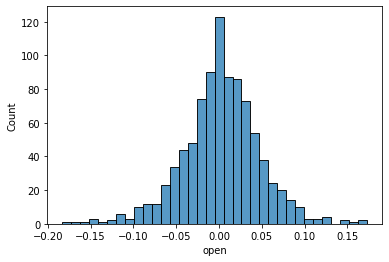

In [24]:
sns.histplot(log_return)

In [ ]:
tickerDict = {}
listTickers = si.tickers_sp500()
for listTicker in listTickers:
    try:
        tickerDict[listTicker] = si.get_data(listTicker)
        print(listTicker, "collected")
    except:
        e = sys.exc_info()[0]
        tickerDict[listTicker] = df[0:0]
        print(listTicker, 'falled')
        print(Exception)

A collected
AAL collected
AAP collected
AAPL collected
ABBV collected
ABC collected
ABMD collected
ABT collected
ACN collected
ADBE collected
ADI collected
ADM collected
ADP collected
ADSK collected
AEE collected
AEP collected
AES collected
AFL collected
AIG collected
AIZ collected
AJG collected
AKAM collected
ALB collected
ALGN collected
ALK collected
ALL collected
ALLE collected
AMAT collected
AMCR collected
AMD collected
AME collected
AMGN collected
AMP collected
AMT collected
AMZN collected
ANET collected
ANSS collected
ANTM collected
AON collected
AOS collected
APA falled
<class 'Exception'>
APD collected
APH collected
APTV collected
ARE collected
ATO collected
ATVI collected
AVB collected
AVGO collected
AVY falled
<class 'Exception'>
AWK collected
AXP collected
AZO collected
BA collected
BAC collected
BAX collected
BBWI collected
BBY collected
BDX collected
BEN collected
BF-B collected
BIIB falled
<class 'Exception'>
BIO collected


## Application to option pricing

Using the `bokeh` library, analyse graphically the influence of the maturity $T$ and the volatility parameter $\sigma$ on the function $K\mapsto C^{\mathrm{BS}}(S_0, K, T, \sigma)$, for some fixed $S_0 = 100$, as $K$ ranges from $50$ to $100$. We assume no interest and no dividend.

In [9]:
from scipy.stats import norm
from scipy.stats import norm
import numpy as np
import bokeh.plotting.figure as bk_figure
from bokeh.io import curdoc, show
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import output_notebook  # enables plot interface in J notebook

from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler

bokeh.io.output_notebook()

def BSCall(S0, K, sigma, t, T):
    '''
    #Inputs:
    S0: initial stock price
    K: strike
    sigma: instantaneous volatility
    T: time to maturity
    #Output:
    Black-Scholes Call price
    '''
    tau = T - t
    sigmtau = sigma*np.sqrt(tau)
    k = np.log(K/S0)
    dp = -k / sigmtau + 0.5*sigmtau
    dm = dp - sigmtau
    return S0*(norm.cdf(dp) - np.exp(k)*norm.cdf(dm))

S0, K, sigma, t, T = 100., 100., 0.2, 0., 1.
print("Black-Scholes Call option price:", BSCall(S0,K,sigma,t,T))

Loading BokehJS ...

Black-Scholes Call option price: 7.965567455405798


In [10]:
# Set up data
n = 200
KK = np.linspace(0.1*S0, 3.*S0, n)
cc = np.array([BSCall(S0,K,sigma,t,T) for K in KK])
source = ColumnDataSource(data=dict(x=KK, y=cc))

# Set up plot
plot = bk_figure(plot_height=400, plot_width=400, title="Black-Scholes Call Price function",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[np.min(KK), np.max(KK)], y_range=[np.min(cc), np.max(cc)])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

vol = Slider(title="Volatility", value=sigma, start=0.01, end=1., step=0.02)
maturity = Slider(title="Maturity", value=T, start=0.1, end=5., step=0.1)

def update_data(attrname, old, new):
    # Get the current slider values
    mat = maturity.value
    v = vol.value
    # Generate the new curve
    newcc = np.array([BSCall(S0,K,v,0.,mat) for K in KK])

    source.data = dict(x=KK, y=newcc)

for w in [vol, maturity]:
    w.on_change('value', update_data)

# Set up layouts and add to document
inputs = widgetbox(vol, maturity)
layout = row(plot, widgetbox(vol, maturity))

def modify_doc(doc):
    doc.add_root(row(layout, width=800))
    doc.title = "Sliders"

handler = FunctionHandler(modify_doc)
show(Application(handler))

## Analysis of the S&P 500

What are the 5 largest holders of S&P 500 companies and how much do they own in total?

## Webscraping

Write a procedure/function importHistData(crypto, startDate, endDate), 
which fetches a cryptocurrency (indicated by its ticker "crypto"), and import its daily end-of-day values 
between startDate, endDate, and plots it.
The data is available on the website https://coinmarketcap.com/currencies/

**Hints and Warnings**:
- The input date format should be "datetime(YYYY, MM, DD)"
- You need to use the Python packages beautifulSoup, requests, datetime, matplotlib
- Exeamples of cryptocurrency tickers: "bitcoin", "ethereum-classic", "litecoin", "tezos", "kyber-network", "chainlink"
- Be careful with date and value formats